In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# data set
fruits = pd.read_table('fruit_data_with_colors.txt')

X_fruits = fruits[['height', 'width','mass','color_score']]
y_fruits = fruits['fruit_label']

In [4]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

X_train,X_test, y_train, y_test = train_test_split(X_fruits, y_fruits,random_state = 0)

logisticRegressionClf = LogisticRegression().fit(X_train, y_train)

trainScore1 = logisticRegressionClf.score(X_train,y_train)
testScore1 = logisticRegressionClf.score(X_test,y_test)

print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(logisticRegressionClf.score(X_train,y_train)))
print("Accuracy of Logistic regression classifier on test set: {:.2f}".format(logisticRegressionClf.score(X_test,y_test)))

Accuracy of Logistic regression classifier on training set: 0.82
Accuracy of Logistic regression classifier on test set: 0.47


C:\Users\SUNGYONG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [5]:
# SVM

from sklearn.svm import SVC
svmClf = SVC(kernel = 'linear').fit(X_train, y_train)

trainScore2 = svmClf.score(X_train,y_train)
testScore2 = svmClf.score(X_test,y_test)

print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(svmClf.score(X_train,y_train)))
print("Accuracy of Logistic regression classifier on test set: {:.2f}".format(svmClf.score(X_test,y_test)))

Accuracy of Logistic regression classifier on training set: 0.82
Accuracy of Logistic regression classifier on test set: 0.60


In [6]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
decisionClf = DecisionTreeClassifier().fit(X_train, y_train)

trainScore3 = decisionClf.score(X_train,y_train)
testScore3 = decisionClf.score(X_test,y_test)

print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(decisionClf.score(X_train,y_train)))
print("Accuracy of Logistic regression classifier on test set: {:.2f}".format(decisionClf.score(X_test,y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.87


In [7]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
forestClf = RandomForestClassifier(n_estimators = 10, random_state = 0).fit(X_train, y_train)

trainScore4 = forestClf.score(X_train,y_train)
testScore4 = forestClf.score(X_test,y_test)
print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(forestClf.score(X_train,y_train)))
print("Accuracy of Logistic regression classifier on test set: {:.2f}".format(forestClf.score(X_test,y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.80


<IPython.core.display.Javascript object>


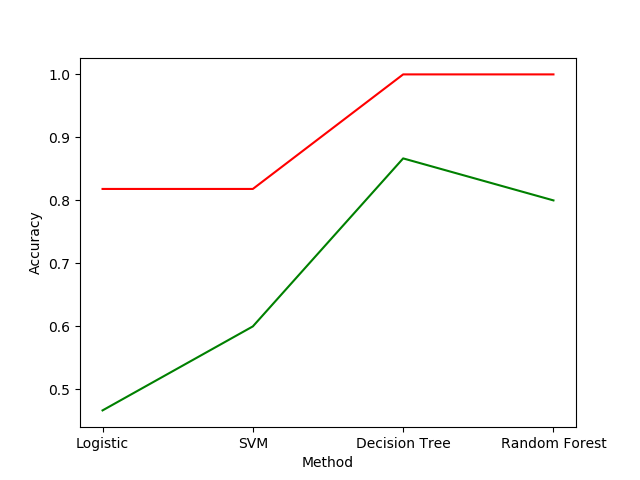

In [8]:
# plot 그래프로 더 좋은 성능 확인

# Training data set
x_values = ["Logistic","SVM","Decision Tree","Random Forest"]
y_values = [trainScore1, trainScore2, trainScore3, trainScore3]

# Test data set
xt_values = ["Logistic","SVM","Decision Tree","Random Forest"]
yt_values = [testScore1, testScore2, testScore3, testScore4]

plt.figure()
plt.ylabel('Accuracy')
plt.xlabel('Method')
plt.plot(x_values,y_values, color = 'red')
plt.plot(xt_values,yt_values, color = 'green')
plt.show()

In [9]:
# Disicion Tree와, Random Forest가 비슷한 성능을 보이나
# Random Forest가 test데이터에 대해 랜덤으로 더 좋은 성능을 보이므로
# Random Forest로 예측을 진행

In [10]:
# 과일 이름 맵핑
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))

# 과일 이름 확인
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [16]:
# height, width, mass, colot_score순으로 작성
fruit_prediction = forestClf.predict([[8,6,120,0.7]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'